# Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pysheds.grid import Grid
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_palette('husl', 8)

# Create a flow direction grid from a raster

Data from USGS hydrosheds project: https://hydrosheds.cr.usgs.gov/datadownload.php

In [3]:
grid = Grid.from_raster('../data/n30w100_dir', data_name='dir')

# Specify flow direction values

In [4]:
         #N    NE    E    SE    S    SW    W    NW
dirmap = (64,  128,  1,   2,    4,   8,    16,  32)

# Delineate catchment

In [5]:
# Specify pour point
x, y = -97.294167, 32.73750

# Delineate the catchment
grid.catchment(data='dir', x=x, y=y, dirmap=dirmap, out_name='catch',
               recursionlimit=15000, xytype='label')

In [6]:
# Clip the bounding box to the catchment
grid.clip_to('catch')

# Get flow accumulation

In [7]:
grid.accumulation(data='catch', dirmap=dirmap, pad_inplace=False, out_name='acc')

# Extract river network

In [8]:
branches, yx = grid.extract_river_network('catch', 'acc', threshold=200, dirmap=dirmap)

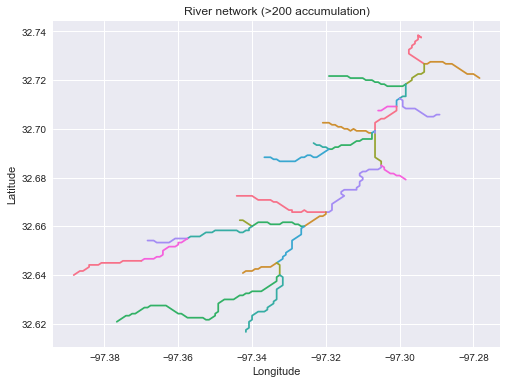

In [9]:
fig, ax = plt.subplots(figsize=(8,6))

plt.grid('on', zorder=0)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('River network (>200 accumulation)')

for branch in branches:
    line = yx[branch]
    plt.plot(line[:, 1], line[:, 0])

In [10]:
branches, yx = grid.extract_river_network('catch', 'acc', threshold=50, dirmap=dirmap)

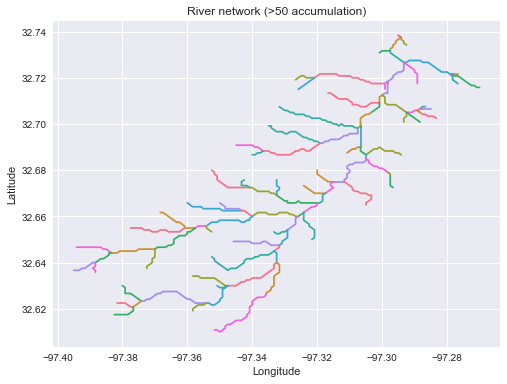

In [11]:
fig, ax = plt.subplots(figsize=(8,6))

plt.grid('on', zorder=0)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('River network (>50 accumulation)')

for branch in branches:
    line = yx[branch]
    plt.plot(line[:, 1], line[:, 0])

plt.savefig('img/river_network.png', bbox_inches='tight')

In [12]:
branches, yx = grid.extract_river_network('catch', 'acc', threshold=2, dirmap=dirmap)

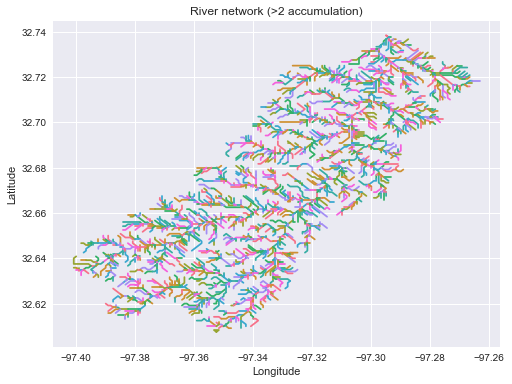

In [13]:
fig, ax = plt.subplots(figsize=(8,6))

plt.grid('on', zorder=0)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('River network (>2 accumulation)')

for branch in branches:
    line = yx[branch]
    plt.plot(line[:, 1], line[:, 0])